In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pathlib

In [2]:
tf.test.is_gpu_available()

True

In [3]:
data_dir = './data/2_class'

In [4]:
data_route = pathlib.Path(data_dir)  #提取路径

In [5]:
for item in data_route.iterdir():
    print(item)

data\2_class\airplane
data\2_class\lake


In [6]:
all_img_path = list(data_route.glob('*/*'))

In [7]:
len(all_img_path)

1400

In [8]:
all_img_path[-3:]            #各700张图

[WindowsPath('data/2_class/lake/lake_698.jpg'),
 WindowsPath('data/2_class/lake/lake_699.jpg'),
 WindowsPath('data/2_class/lake/lake_700.jpg')]

In [9]:
all_img_path = [str(path) for path in all_img_path]   #使用str方法变为实际路径

In [10]:
all_img_path[10:12]

['data\\2_class\\airplane\\airplane_011.jpg',
 'data\\2_class\\airplane\\airplane_012.jpg']

In [11]:
import random

In [12]:
random.shuffle(all_img_path)       #乱序

In [13]:
all_img_path[10:12]

['data\\2_class\\lake\\lake_480.jpg', 'data\\2_class\\lake\\lake_106.jpg']

In [14]:
img_count = len(all_img_path)      #记录
img_count

1400

In [15]:
label_names = sorted(item.name for item in data_route.glob('*/'))    #提取出所有目录名字作为label
label_names

['airplane', 'lake']

In [16]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))   #字典编码
label_to_index

{'airplane': 0, 'lake': 1}

In [17]:
all_img_path[:3]

['data\\2_class\\airplane\\airplane_365.jpg',
 'data\\2_class\\lake\\lake_241.jpg',
 'data\\2_class\\lake\\lake_634.jpg']

In [18]:
pathlib.Path('data\\2_class\\lake\\lake_124.jpg').parent.name

'lake'

In [19]:
all_img_label  = [label_to_index[pathlib.Path(p).parent.name] for p in all_img_path]   #列表推导式，对所有样本取其parent作为label

In [20]:
all_img_label[:5]

[0, 1, 1, 1, 1]

In [21]:
all_img_path[:5]                               #取得label和imgpath后可以构造tf.data对象

['data\\2_class\\airplane\\airplane_365.jpg',
 'data\\2_class\\lake\\lake_241.jpg',
 'data\\2_class\\lake\\lake_634.jpg',
 'data\\2_class\\lake\\lake_194.jpg',
 'data\\2_class\\lake\\lake_069.jpg']

In [22]:
import IPython.display as display             #IPython的显示图片功能

In [23]:
index_to_label = dict((v,k) for (k,v) in label_to_index.items())   #编码反查字典
index_to_label

{0: 'airplane', 1: 'lake'}

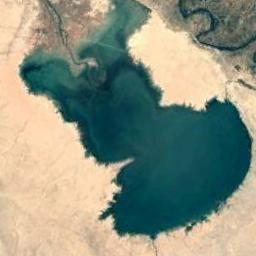

lake



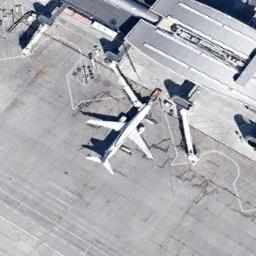

airplane



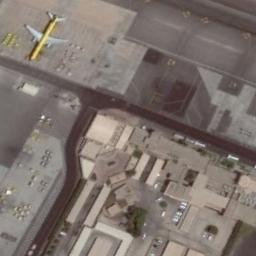

airplane



In [24]:
for n in range(3):
    img_index = random.choice(range(len(all_img_path)))
    display.display(display.Image(all_img_path[img_index]))
    print(index_to_label[all_img_label[img_index]])
    print()

In [25]:
img_path = all_img_path[0]

In [26]:
img_path

'data\\2_class\\airplane\\airplane_365.jpg'

In [27]:
img_raw = tf.io.read_file(img_path)            #tensorflow 提供的读取图片的方法,读取的是tf.tensor的二进制数据类型

In [28]:
img_tensor = tf.image.decode_image(img_raw)    #解码

In [29]:
img_tensor.shape

TensorShape([256, 256, 3])

In [30]:
img_tensor.dtype

tf.uint8

In [31]:
img_tensor = tf.cast(img_tensor, tf.float32)     #cast数据类型转换方法

In [32]:
img_tensor = img_tensor/255                     #标准化

In [33]:
img_tensor.numpy().max()

1.0

In [34]:
img_tensor.numpy().min()

0.0

In [35]:
def load_preprosess_image(img_path):                          #根据函数路径加载并且返回归一化处理后的图片
    img_raw = tf.io.read_file(img_path)
    img_tensor = tf.image.decode_jpeg(img_raw, channels=3)
    img_tensor = tf.image.resize(img_tensor, [256,256])
    img_tensor = tf.cast(img_tensor, tf.float32)   #cast方法进制转换
    img = img_tensor/255   
    return img

In [36]:
image_path = all_img_path[500]

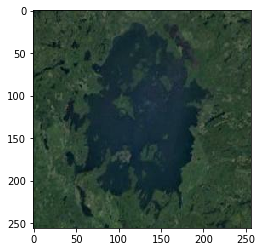

In [37]:
plt.imshow(load_preprosess_image(image_path))

# 开始构造tf.data

In [38]:
path_ds = tf.data.Dataset.from_tensor_slices(all_img_path)

In [39]:
image_dataset = path_ds.map(load_preprosess_image)

In [40]:
image_dataset

<MapDataset shapes: (256, 256, 3), types: tf.float32>

In [41]:
label_dataset = tf.data.Dataset.from_tensor_slices(all_img_label)

In [42]:
label_dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [43]:
for label in label_dataset.take(10):
    print(label.numpy())

0
1
1
1
1
1
1
0
1
0


In [44]:
for image in image_dataset.take(1):
    print(image)

tf.Tensor(
[[[0.41960785 0.4392157  0.4509804 ]
  [0.41960785 0.4392157  0.4509804 ]
  [0.40784314 0.4392157  0.44705883]
  ...
  [0.41568628 0.4117647  0.39215687]
  [0.41568628 0.41960785 0.39607844]
  [0.4117647  0.41568628 0.39215687]]

 [[0.49411765 0.5137255  0.5254902 ]
  [0.49411765 0.5137255  0.5254902 ]
  [0.4862745  0.5176471  0.5254902 ]
  ...
  [0.41960785 0.41568628 0.39607844]
  [0.41568628 0.41960785 0.39607844]
  [0.4117647  0.41568628 0.39215687]]

 [[0.62352943 0.6431373  0.654902  ]
  [0.61960787 0.6392157  0.6509804 ]
  [0.60784316 0.6392157  0.64705884]
  ...
  [0.41960785 0.41568628 0.39607844]
  [0.4117647  0.41568628 0.39215687]
  [0.40784314 0.4117647  0.3882353 ]]

 ...

 [[0.31764707 0.3529412  0.38039216]
  [0.3137255  0.34901962 0.3764706 ]
  [0.3137255  0.34901962 0.3764706 ]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.41960785 0.41960785 0.41960785]
  [0.4117647  0.4117647  0.4117647 ]]

 [[0.36078432 0.39607844 0.42352942]
  [0.3529412  0.3882353  0

合并数据

In [45]:
dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
dataset

<ZipDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

训练集和测试集划分

In [46]:
test_count = int(img_count*0.2)
train_count = int(img_count-test_count)
test_count, train_count

(280, 1120)

In [47]:
train_datasets = dataset.skip(test_count)

In [48]:
test_datasets = dataset.take(test_count)

In [49]:
BATCH_SIZE = 32

In [50]:
train_datasets = train_datasets.shuffle(train_count).batch(BATCH_SIZE)   #batch加shuffle

In [51]:
test_datasets = test_datasets.batch(BATCH_SIZE)

构建模型

In [52]:
model = tf.keras.Sequential() 
model.add(tf.keras.layers.Conv2D(64,(3,3), input_shape = (256, 256, 3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(256,(3,3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(256,(3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())                                 
model.add(tf.keras.layers.Conv2D(512,(3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())                                  
model.add(tf.keras.layers.Conv2D(512,(3,3), activation = 'relu'))                                 
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(1024,(3,3), activation = 'relu'))  
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024, activation='relu'))                                 
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 512)       1

In [54]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc']              
)

In [55]:
step_per_epoch = train_count//BATCH_SIZE
validation_steps = test_count//BATCH_SIZE

In [56]:
history = model.fit(train_datasets, epochs = 30, steps_per_epoch = step_per_epoch, validation_data=test_datasets, validation_steps = validation_steps)

Train for 35 steps, validate for 8 steps
Epoch 1/30
 1/35 [..............................] - ETA: 3:06

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv2d/Conv2D (defined at C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_distributed_function_1419]

Function call stack:
distributed_function
